In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("county_phyto.csv").fillna(0)
wp8 = pd.read_csv('wp8_phytocounts.csv').fillna(0)
ctd_2018 = pd.read_csv('CTD_2018.csv')
ctd_2019 = pd.read_csv('CTD_2019.csv')
ctd_2021 = pd.read_csv('CTD_2021.csv')
ctd_2022 = pd.read_csv('CTD_2022.csv')
ctd_2023 = pd.read_csv('CTD_2023.csv')
## wp8 coords are lat: 47 36.228 lon: 122 25.505

In [3]:
lsep01 = df[df['Locator'] == 'LSEP01']
lsep01['Collect Date'] = pd.to_datetime(lsep01['Collect Date'])
yr_grp = lsep01.groupby([pd.Grouper(key = 'Collect Date'), pd.Grouper(key = 'Locator'), pd.Grouper(key = 'Taxon')])
yr_grp.head()

#aprils data is 2022-04-19

# maybe make puget sound plot showing where wp 8 is shared with LSEP01
# maybe group by years to see how phytoplankton abundance has changed over the entire dataset for LSEP01
## kathy said group by 2023 and 2022 to start off/if i dont have enough time to make more. Then if i do that in time or if i dont see any differences, to add more years stacked
## so group by locator and year specifically for df and use abundance ??

C:\Users\Krist\AppData\Local\Temp\ipykernel_10356\2084908805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lsep01['Collect Date'] = pd.to_datetime(lsep01['Collect Date'])


,Locator,Site Name,Sample Number,Collect Date,Depth (m),Taxon,Rank,Kingdom,Phylum,Class,...,Biovolume (mm^3/L),Abundance (particles/mL),Quality,Steward Note,Sample ID,Grab ID,Profile ID,Replicates,Replicates Of,DataSource
0,LSEP01,South Plant Outfall,L75014-5 DUP,2020-07-21,1.0,Rhizosolenia setigera,Species,Chromista,Ochrophyta,Bacillariophyceae,...,0.474400,31.3400,1,0,193176,192432.0,80506,0.0,0.0,KCEL
30,LSEP01,South Plant Outfall,L75014-5,2020-07-21,1.0,Pseudo-nitzschia,Genus,Chromista,Ochrophyta,Bacillariophyceae,...,0.168000,100.9000,1,0,193134,192432.0,80506,0.0,0.0,KCEL
46,LSEP01,South Plant Outfall,L76779-5,2021-05-04,1.0,Thalassiosira,Genus,Chromista,Ochrophyta,Bacillariophyceae,...,0.005834,0.3289,1,0,198048,198048.0,81861,0.0,0.0,KCEL
48,LSEP01,South Plant Outfall,L76779-5,2021-05-04,1.0,unidentified 25-100 micron,0,0,0,0,...,0.042070,1.3720,1,0,198048,198048.0,81861,0.0,0.0,KCEL
89,LSEP01,South Plant Outfall,L70050-5,2018-05-22,1.0,Chaetoceros,Genus,Chromista,Ochrophyta,Bacillariophyceae,...,60.880000,1368.0000,1,0,156030,156030.0,68217,0.0,0.0,KCEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40324,LSEP01,South Plant Outfall,L80587-5 DUP,2022-12-06,1.1,unidentified 25-100 micron,0,0,0,0,...,0.027840,0.4483,1,0,211808,211808.0,85456,0.0,0.0,KCEL
40325,LSEP01,South Plant Outfall,L80425-5,2022-11-15,1.1,unidentified dinoflagellate <25 micron,Within Class Category,Chromista,Myzozoa,Dinophyceae,...,0.008276,4.7270,1,0,212401,212401.0,85445,0.0,0.0,KCEL
40333,LSEP01,South Plant Outfall,L80587-5 DUP,2022-12-06,1.1,small ciliates,Within Subphylum Category,Chromista,Ciliophora,0,...,0.007948,2.2410,1,0,211808,211808.0,85456,0.0,0.0,KCEL
40334,LSEP01,South Plant Outfall,L80587-5 DUP,2022-12-06,1.1,Gymnodiniales,Order,Chromista,Myzozoa,Dinophyceae,...,0.009558,0.4483,1,0,211808,211808.0,85456,0.0,0.0,KCEL


## Refining data to find april data of each year for king county data

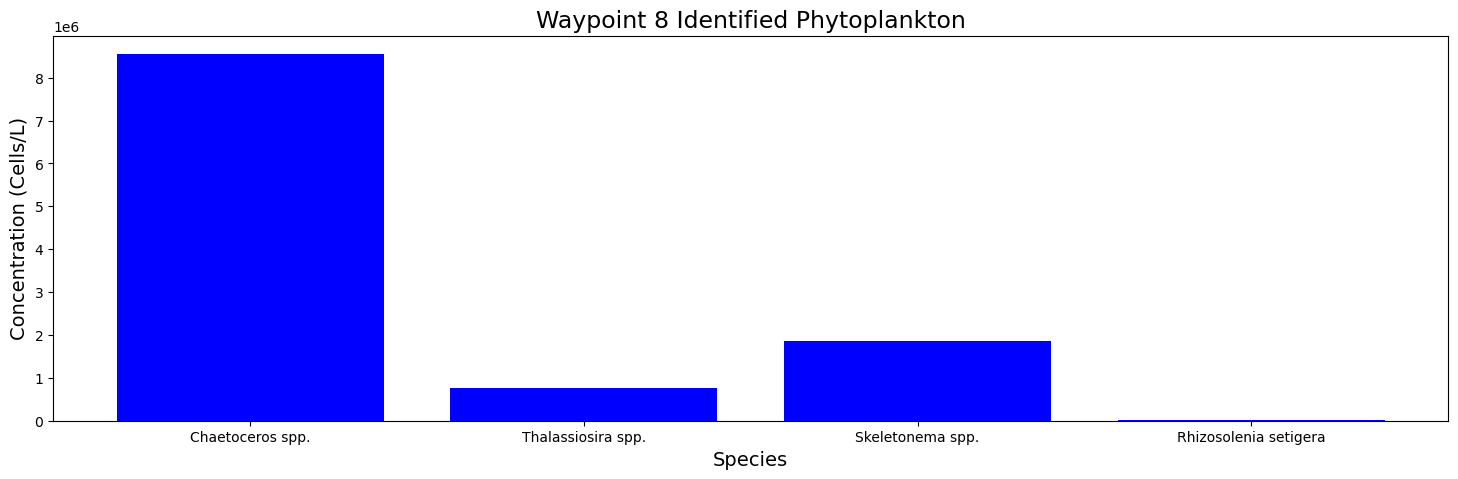

In [5]:
chaet_wp8 = wp8[wp8['Species'] == 'Chaetoceros spp.']
thal_wp8 = wp8[wp8['Species'] == 'Thalassiosira spp.']
skele_wp8 = wp8[wp8['Species'] == 'Skeletonema spp.']
rhiz_wp8 = wp8[wp8['Species'] == 'Rhizosolenia setigera'] ## one cell counted so concentration is very low
species_wp8 = pd.concat([chaet_wp8, thal_wp8, skele_wp8, rhiz_wp8])

f, ax = plt.subplots(figsize=(18,5))
plt.bar(species_wp8['Species'], species_wp8['Concentration'], color = 'blue')
plt.title('Waypoint 8 Identified Phytoplankton', fontsize=17)
plt.xlabel('Species', fontsize=14)
plt.ylabel('Concentration (Cells/L)', fontsize=14)
plt.show()

### 2022 Taxon

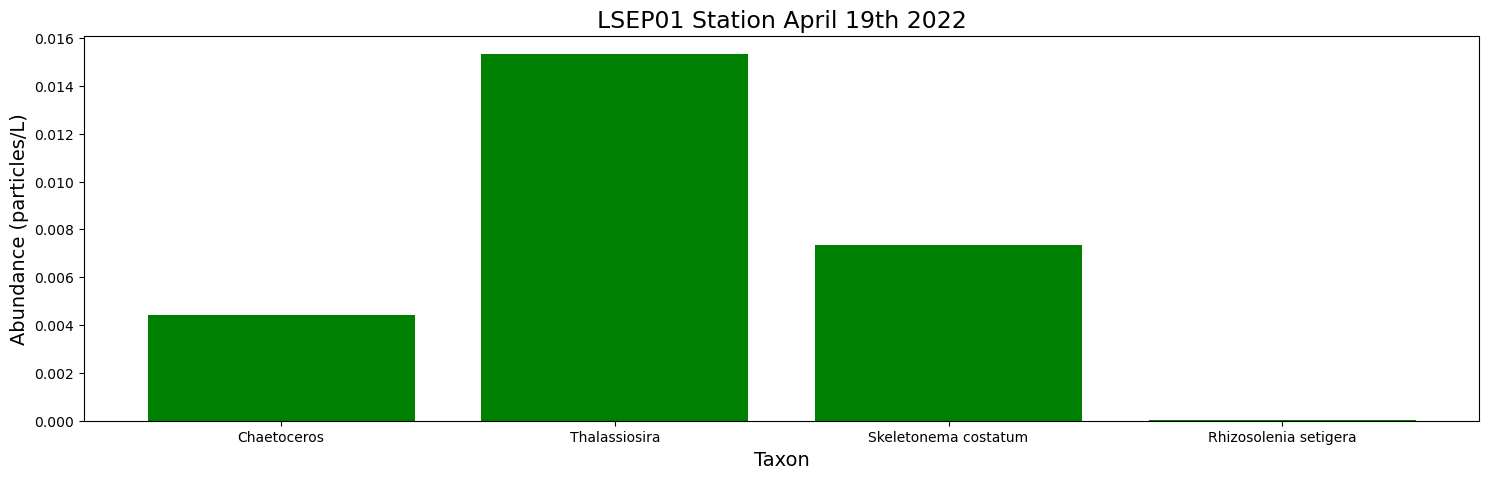

In [5]:
phyto_2022 = lsep01[lsep01['Collect Date'] == '04-19-2022']
chaet_2022 = phyto_2022[phyto_2022['Taxon'] == 'Chaetoceros']
thal_2022 = phyto_2022[phyto_2022['Taxon'] == 'Thalassiosira']
skele_2022 = phyto_2022[phyto_2022['Taxon'] == 'Skeletonema costatum']
rhiz_2022 = phyto_2022[phyto_2022['Taxon'] == 'Rhizosolenia setigera']
species_2022 = pd.concat([chaet_2022, thal_2022, skele_2022, rhiz_2022])


f, ax = plt.subplots(figsize=(18,5))
plt.bar(species_2022['Taxon'], species_2022['Abundance (particles/mL)']*10**-3, color= 'green')
plt.title('LSEP01 Station April 19th 2022', fontsize=17)
plt.xlabel('Taxon', fontsize=14)
plt.ylabel('Abundance (particles/L)', fontsize=14)
plt.show()


### 2021 Taxon

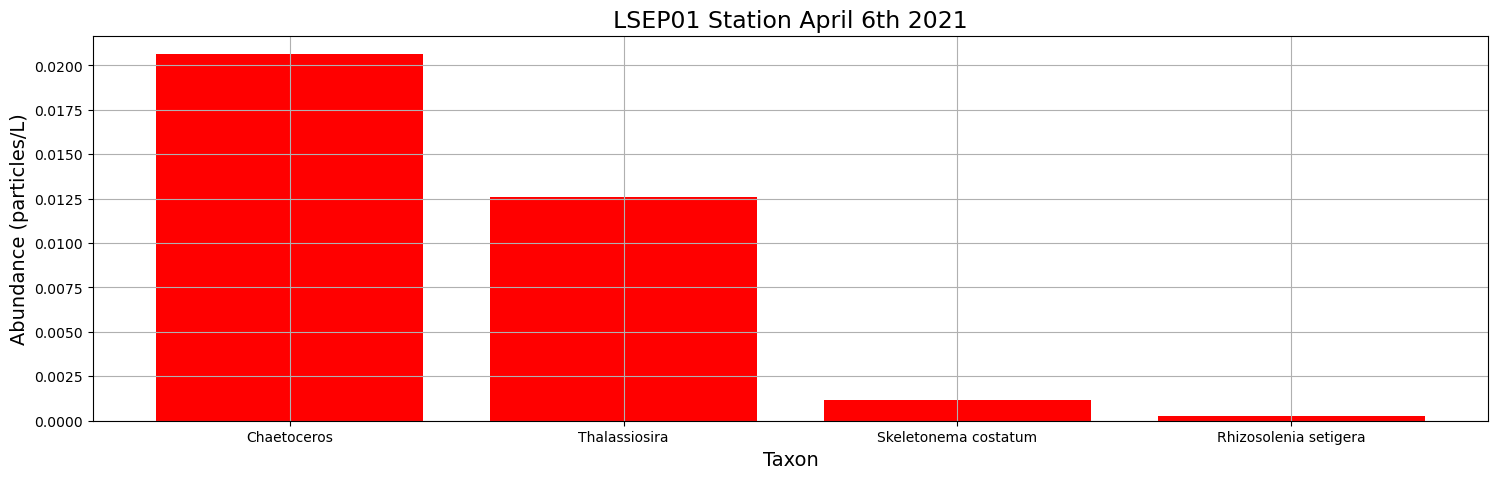

In [7]:
phyto_2021_1st = lsep01[lsep01['Collect Date'] == '04-06-2021']
chaet_2021_1st = phyto_2021_1st[phyto_2021_1st['Taxon'] == 'Chaetoceros']
thal_2021_1st = phyto_2021_1st[phyto_2021_1st['Taxon'] == 'Thalassiosira']
skele_2021_1st = phyto_2021_1st[phyto_2021_1st['Taxon'] == 'Skeletonema costatum']
rhiz_2021_1st = phyto_2021_1st[phyto_2021_1st['Taxon'] == 'Rhizosolenia setigera']
species_2021_1st = pd.concat([chaet_2021_1st, thal_2021_1st, skele_2021_1st, rhiz_2021_1st])


f, ax = plt.subplots(figsize=(18,5))
plt.bar(species_2021_1st['Taxon'], species_2021_1st['Abundance (particles/mL)']*10**-3, color= 'red', label = 'April 6th')
plt.title('LSEP01 Station April 6th 2021', fontsize=17)
plt.xlabel('Taxon', fontsize=14)
plt.ylabel('Abundance (particles/L)', fontsize=14)
plt.grid(True)
plt.show()

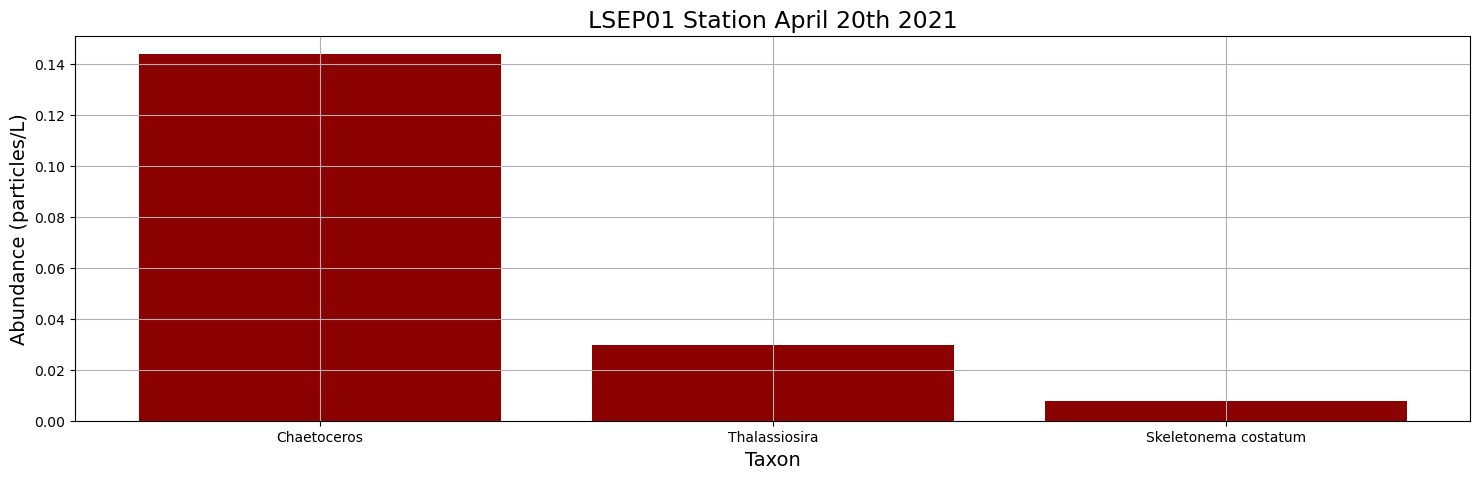

In [8]:
phyto_2021_2nd = lsep01[lsep01['Collect Date'] == '04-20-2021']
chaet_2021_2nd = phyto_2021_2nd[phyto_2021_2nd['Taxon'] == 'Chaetoceros']
thal_2021_2nd = phyto_2021_2nd[phyto_2021_2nd['Taxon'] == 'Thalassiosira']
skele_2021_2nd = phyto_2021_2nd[phyto_2021_2nd['Taxon'] == 'Skeletonema costatum']
species_2021_2nd = pd.concat([chaet_2021_2nd, thal_2021_2nd, skele_2021_2nd])

f, ax = plt.subplots(figsize=(18,5))
plt.bar(species_2021_2nd['Taxon'], species_2021_2nd['Abundance (particles/mL)']*10**-3, color= 'darkred')

plt.title('LSEP01 Station April 20th 2021', fontsize=17)
plt.xlabel('Taxon', fontsize=14)
plt.ylabel('Abundance (particles/L)', fontsize=14)
plt.grid(True)
plt.show()

In [9]:
## attemping to average the two samples in april 2021

phyto2021 = lsep01.loc[(lsep01['Collect Date'] == '04-06-2021') | (lsep01['Collect Date'] == '04-20-2021')]
chaet2021 = phyto2021[phyto2021['Taxon'] == 'Chaetoceros'].mean()
thal2021 = phyto2021[phyto2021['Taxon'] == 'Thalassiosira'].mean()
skele2021 = phyto2021[phyto2021['Taxon'] == 'Skeletonema costatum'].mean()
rhiz2021 = phyto2021[phyto2021['Taxon'] == 'Rhizosolenia setigera'].mean()

C:\Users\Krist\AppData\Local\Temp\ipykernel_6776\3535708478.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  chaet2021 = phyto2021[phyto2021['Taxon'] == 'Chaetoceros'].mean()
C:\Users\Krist\AppData\Local\Temp\ipykernel_6776\3535708478.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  chaet2021 = phyto2021[phyto2021['Taxon'] == 'Chaetoceros'].mean()
C:\Users\Krist\AppData\Local\Temp\ipykernel_6776\3535708478.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  thal2021 = phyto2021[phyto2021['Taxon'] == 'Thalassiosira'].mean()
C:\Users\Krist\AppData\Local\Temp

### 2019 Taxon

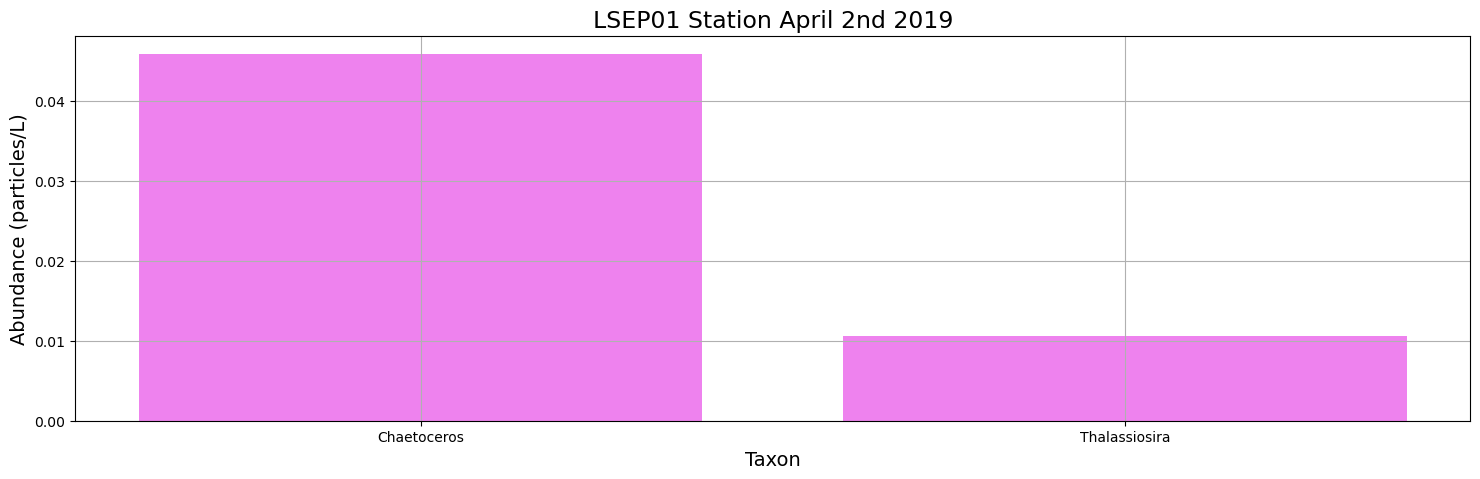

In [10]:
phyto_2019_1st = lsep01[lsep01['Collect Date'] == '04-02-2019']
chaet_2019_1st = phyto_2019_1st[phyto_2019_1st['Taxon'] == 'Chaetoceros']
thal_2019_1st = phyto_2019_1st[phyto_2019_1st['Taxon'] == 'Thalassiosira']
species_2019_1st = pd.concat([chaet_2019_1st, thal_2019_1st])


f, ax = plt.subplots(figsize=(18,5))
plt.bar(species_2019_1st['Taxon'], species_2019_1st['Abundance (particles/mL)']*10**-3, color= 'violet')

plt.title('LSEP01 Station April 2nd 2019', fontsize=17)
plt.xlabel('Taxon', fontsize=14)
plt.ylabel('Abundance (particles/L)', fontsize=14)
plt.grid(True)
plt.show()

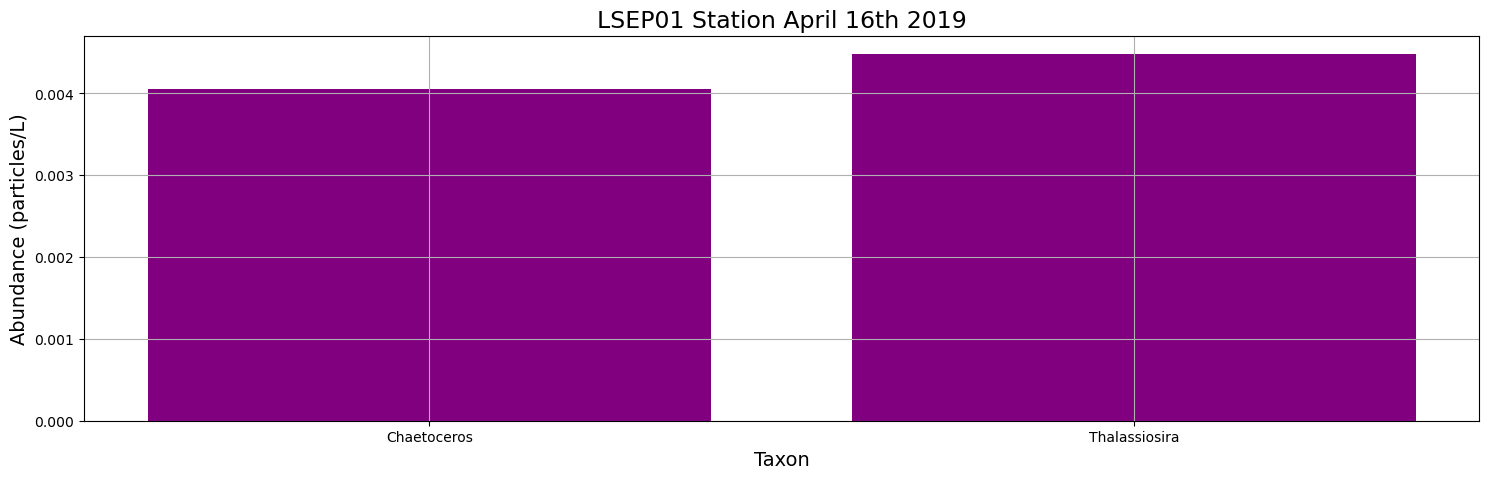

In [11]:
phyto_2019_2nd = lsep01[lsep01['Collect Date'] == '04-16-2019']
chaet_2019_2nd = phyto_2019_2nd[phyto_2019_2nd['Taxon'] == 'Chaetoceros']
thal_2019_2nd = phyto_2019_2nd[phyto_2019_2nd['Taxon'] == 'Thalassiosira']
species_2019_2nd = pd.concat([chaet_2019_2nd, thal_2019_2nd])

f, ax = plt.subplots(figsize=(18,5))
plt.bar(species_2019_2nd['Taxon'], species_2019_2nd['Abundance (particles/mL)']*10**-3, color= 'purple')

plt.title('LSEP01 Station April 16th 2019', fontsize=17)
plt.xlabel('Taxon', fontsize=14)
plt.ylabel('Abundance (particles/L)', fontsize=14)
plt.grid(True)
plt.show()

In [12]:
phyto2019 = lsep01.loc[(lsep01['Collect Date'] == '04-02-2019') | (lsep01['Collect Date'] == '04-16-2019')]
chaet2019 = phyto2019[phyto2019['Taxon'] == 'Chaetoceros'].mean()
thal2019 = phyto2019[phyto2019['Taxon'] == 'Thalassiosira'].mean()

C:\Users\Krist\AppData\Local\Temp\ipykernel_6776\3220821994.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  chaet2019 = phyto2019[phyto2019['Taxon'] == 'Chaetoceros'].mean()
C:\Users\Krist\AppData\Local\Temp\ipykernel_6776\3220821994.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  chaet2019 = phyto2019[phyto2019['Taxon'] == 'Chaetoceros'].mean()
C:\Users\Krist\AppData\Local\Temp\ipykernel_6776\3220821994.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  thal2019 = phyto2019[phyto2019['Taxon'] == 'Thalassiosira'].mean()
C:\Users\Krist\AppData\Local\Temp

### 2018 Taxon

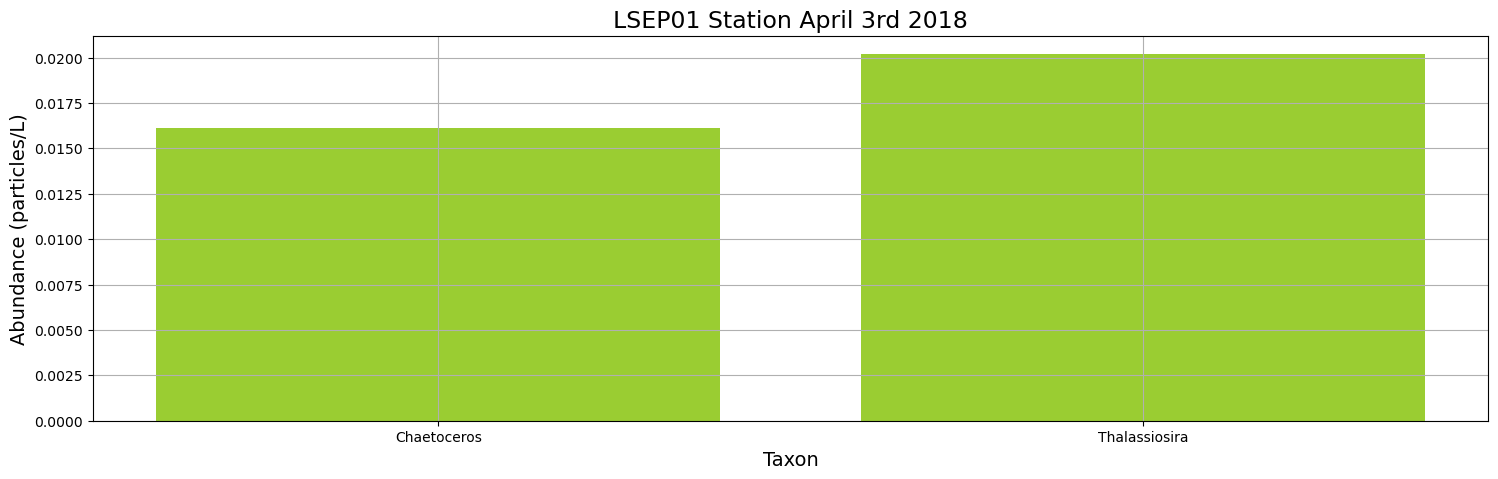

In [13]:
## no skele or rhiz for this year

phyto_2018_1st = lsep01[lsep01['Collect Date'] == '04-03-2018']
chaet_2018_1st = phyto_2018_1st[phyto_2018_1st['Taxon'] == 'Chaetoceros']
thal_2018_1st = phyto_2018_1st[phyto_2018_1st['Taxon'] == 'Thalassiosira']
species_2018_1st = pd.concat([chaet_2018_1st, thal_2018_1st])


f, ax = plt.subplots(figsize=(18,5))
plt.bar(species_2018_1st['Taxon'], species_2018_1st['Abundance (particles/mL)']*10**-3, color= 'yellowgreen')

plt.title('LSEP01 Station April 3rd 2018', fontsize=17)
plt.xlabel('Taxon', fontsize=14)
plt.ylabel('Abundance (particles/L)', fontsize=14)
plt.grid(True)
plt.show()

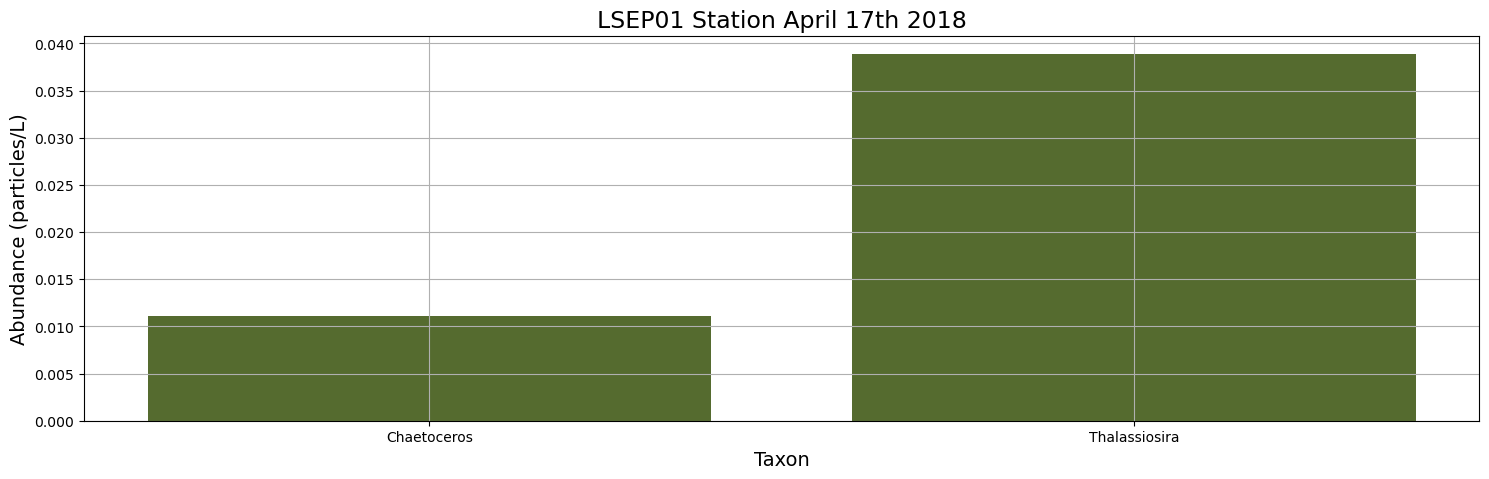

In [14]:
## no skele or rhiz for this year
phyto_2018_2nd = lsep01[lsep01['Collect Date'] == '04-17-2018']
chaet_2018_2nd = phyto_2018_2nd[phyto_2018_2nd['Taxon'] == 'Chaetoceros']
thal_2018_2nd = phyto_2018_2nd[phyto_2018_2nd['Taxon'] == 'Thalassiosira']
species_2018_2nd = pd.concat([chaet_2018_2nd, thal_2018_2nd])


f, ax = plt.subplots(figsize=(18,5))
plt.bar(species_2018_2nd['Taxon'], species_2018_2nd['Abundance (particles/mL)']*10**-3, color= 'darkolivegreen')

plt.title('LSEP01 Station April 17th 2018', fontsize=17)
plt.xlabel('Taxon', fontsize=14)
plt.ylabel('Abundance (particles/L)', fontsize=14)
plt.grid(True)
plt.show()

In [15]:
phyto2018 = lsep01.loc[(lsep01['Collect Date'] == '04-03-2018') | (lsep01['Collect Date'] == '04-17-2018')]
chaet2018 = phyto2018[phyto2018['Taxon'] == 'Chaetoceros'].mean()
thal2018 = phyto2018[phyto2018['Taxon'] == 'Thalassiosira'].mean()
thal2018

C:\Users\Krist\AppData\Local\Temp\ipykernel_6776\2928424643.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  chaet2018 = phyto2018[phyto2018['Taxon'] == 'Chaetoceros'].mean()
C:\Users\Krist\AppData\Local\Temp\ipykernel_6776\2928424643.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  chaet2018 = phyto2018[phyto2018['Taxon'] == 'Chaetoceros'].mean()
C:\Users\Krist\AppData\Local\Temp\ipykernel_6776\2928424643.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  thal2018 = phyto2018[phyto2018['Taxon'] == 'Thalassiosira'].mean()
C:\Users\Krist\AppData\Local\Temp

Depth (m)                        1.0300
Species                          0.0000
Biovolume (mm^3/L)               0.4879
Abundance (particles/mL)        29.5350
Quality                          1.0000
Steward Note                     0.0000
Sample ID                   155366.5000
Grab ID                     155366.5000
Profile ID                   68056.0000
Replicates                       0.0000
Replicates Of                    0.0000
dtype: float64

## Depth profiles of each year

In [4]:
real2018 = ctd_2018.dropna(how='all')
real2019 = ctd_2019.dropna(how='all')
real2021 = ctd_2021.dropna(how='all')
real2022 = ctd_2022.dropna(how='all')
real2023 = ctd_2023.dropna(how='all')

In [5]:
up18 = real2018[real2018['UpDown'] == 'Up']
up19 = real2019[real2019['UpDown'] == 'Up']
up21 = real2021[real2021['UpDown'] == 'Up']
up22 = real2022[real2022['UpDown'] == 'Up']
up23 = real2023[real2023['UpDown'] == 'Up']

### 2018

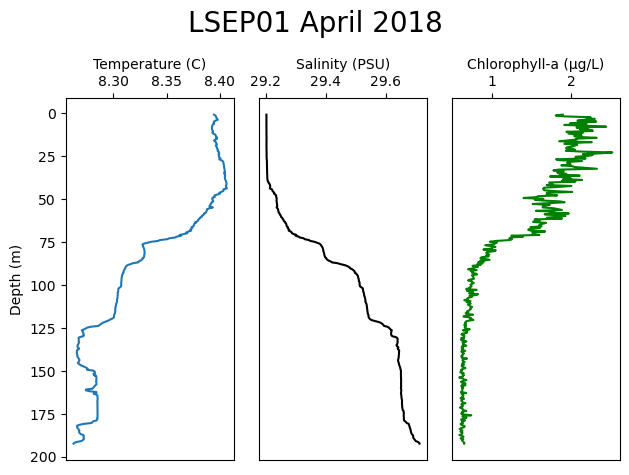

In [6]:
## plotting 3 panel plot for 2018

fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True)

# Temperature
ax1.plot(up18['Sample_Temperature_field'],up18['Sample_Depth'])
ax1.set_ylabel('Depth (m)')
ax1.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax1.set_xlabel('Temperature (C)')
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top

# Salinity
ax2.plot(up18['Salinity_field'],up18['Sample_Depth'], color = 'k')
ax2.set_xlabel('Salinity (PSU)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.yaxis.set_visible(False) # This erases the y ticks

# Fluorescence
ax3.plot(up18['Chla_field'],up18['Sample_Depth'], color = 'green')
ax3.set_xlabel('Chlorophyll-a (µg/L)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax3.yaxis.set_visible(False) # This erases the y ticks

fig.suptitle('LSEP01 April 2018', fontsize = '20')
plt.tight_layout(rect=[0, 0, 1, 1])


### 2019

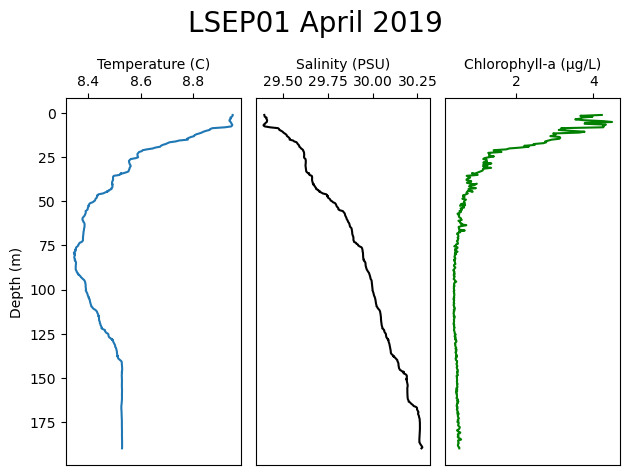

In [7]:
## plotting 3 panel plot for 2019

fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True)

# Temperature
ax1.plot(up19['Sample_Temperature_field'],up19['Sample_Depth'])
ax1.set_ylabel('Depth (m)')
ax1.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax1.set_xlabel('Temperature (C)')
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top

# Salinity
ax2.plot(up19['Salinity_field'],up19['Sample_Depth'], color = 'k')
ax2.set_xlabel('Salinity (PSU)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.yaxis.set_visible(False) # This erases the y ticks

# Fluorescence
ax3.plot(up19['Chla_field'],up19['Sample_Depth'], color = 'green')
ax3.set_xlabel('Chlorophyll-a (µg/L)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax3.yaxis.set_visible(False) # This erases the y ticks

fig.suptitle('LSEP01 April 2019', fontsize = '20')
plt.tight_layout(rect=[0, 0, 1, 1])


### 2021

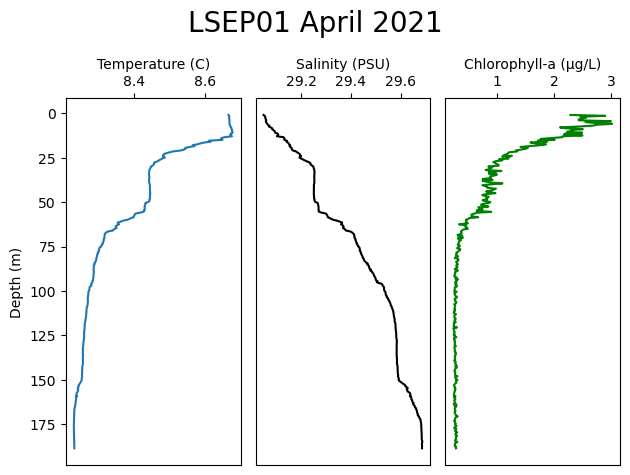

In [8]:
## plotting 3 panel plot for 2021

fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True)

# Temperature
ax1.plot(up21['Sample_Temperature_field'],up21['Sample_Depth'])
ax1.set_ylabel('Depth (m)')
ax1.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax1.set_xlabel('Temperature (C)')
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top

# Salinity
ax2.plot(up21['Salinity_field'],up21['Sample_Depth'], color = 'k')
ax2.set_xlabel('Salinity (PSU)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.yaxis.set_visible(False) # This erases the y ticks

# Fluorescence
ax3.plot(up21['Chla_field'],up21['Sample_Depth'], color = 'green')
ax3.set_xlabel('Chlorophyll-a (µg/L)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax3.yaxis.set_visible(False) # This erases the y ticks

fig.suptitle('LSEP01 April 2021', fontsize = '20')
plt.tight_layout(rect=[0, 0, 1, 1])

### 2022

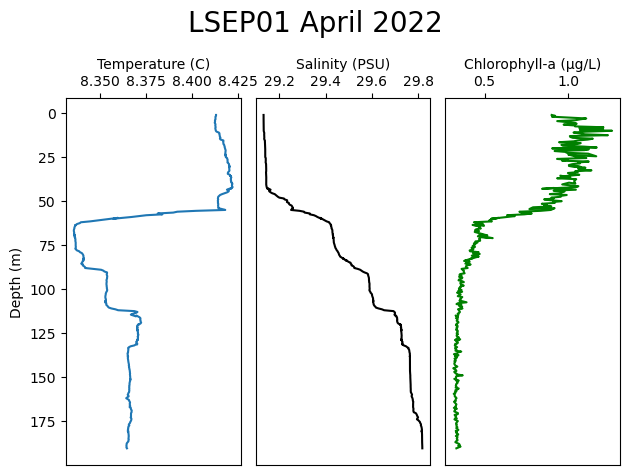

In [9]:
## plotting 3 panel plot for 2022

fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True)

# Temperature
ax1.plot(up22['Sample_Temperature_field'],up22['Sample_Depth'])
ax1.set_ylabel('Depth (m)')
ax1.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax1.set_xlabel('Temperature (C)')
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top

# Salinity
ax2.plot(up22['Salinity_field'],up22['Sample_Depth'], color = 'k')
ax2.set_xlabel('Salinity (PSU)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.yaxis.set_visible(False) # This erases the y ticks

# Fluorescence
ax3.plot(up22['Chla_field'],up22['Sample_Depth'], color = 'green')
ax3.set_xlabel('Chlorophyll-a (µg/L)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax3.yaxis.set_visible(False) # This erases the y ticks

fig.suptitle('LSEP01 April 2022', fontsize = '20')
plt.tight_layout(rect=[0, 0, 1, 1])

### 2023

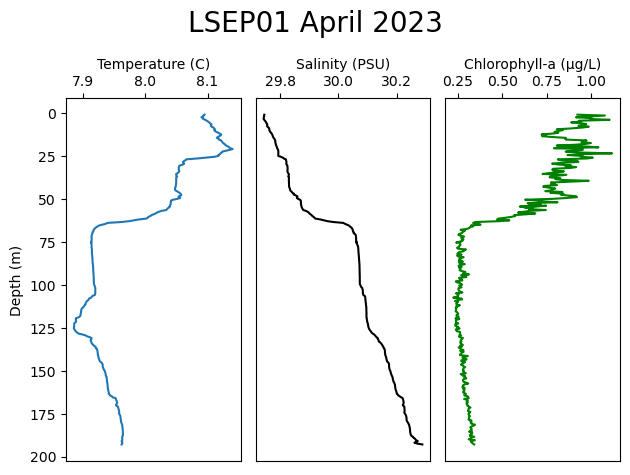

In [10]:
## plotting 3 panel plot for 2023

fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True)

# Temperature
ax1.plot(up23['Sample_Temperature_field'],up23['Sample_Depth'])
ax1.set_ylabel('Depth (m)')
ax1.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax1.set_xlabel('Temperature (C)')
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top

# Salinity
ax2.plot(up23['Salinity_field'],up23['Sample_Depth'], color = 'k')
ax2.set_xlabel('Salinity (PSU)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.yaxis.set_visible(False) # This erases the y ticks

# Fluorescence
ax3.plot(up23['Chla_field'],up23['Sample_Depth'], color = 'green')
ax3.set_xlabel('Chlorophyll-a (µg/L)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax3.yaxis.set_visible(False) # This erases the y ticks

fig.suptitle('LSEP01 April 2023', fontsize = '20')
plt.tight_layout(rect=[0, 0, 1, 1])

## temperature for all years

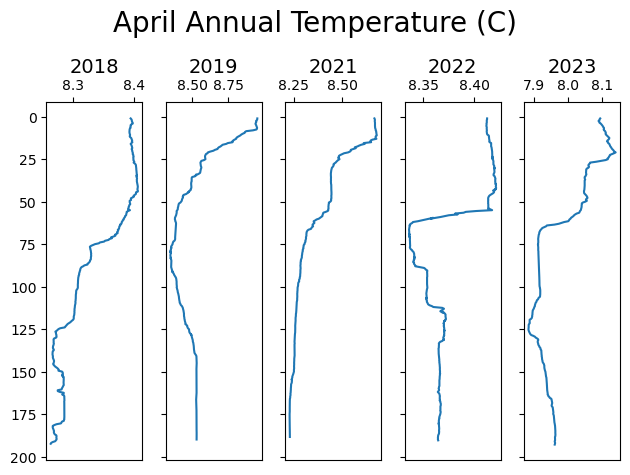

In [13]:
## temperature

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5,sharey=True)

# Temperature
ax1.plot(up18['Sample_Temperature_field'],up18['Sample_Depth'])
ax1.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax1.set_xlabel('2018', fontsize = '14')
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top

# Temperature
ax2.plot(up19['Sample_Temperature_field'],up19['Sample_Depth'])
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('2019', fontsize = '14')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top

# Temperature
ax3.plot(up21['Sample_Temperature_field'],up21['Sample_Depth'])
ax3.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax3.set_xlabel('2021', fontsize = '14')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top

# Temperature
ax4.plot(up22['Sample_Temperature_field'],up22['Sample_Depth'])
ax4.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax4.set_xlabel('2022', fontsize = '14')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top

# Temperature
ax5.plot(up23['Sample_Temperature_field'],up23['Sample_Depth'])
ax5.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax5.set_xlabel('2023', fontsize = '14')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top

fig.suptitle('April Annual Temperature (C)', fontsize = '20')
plt.tight_layout(rect=[0, 0, 1, 1])

## salinity for all years

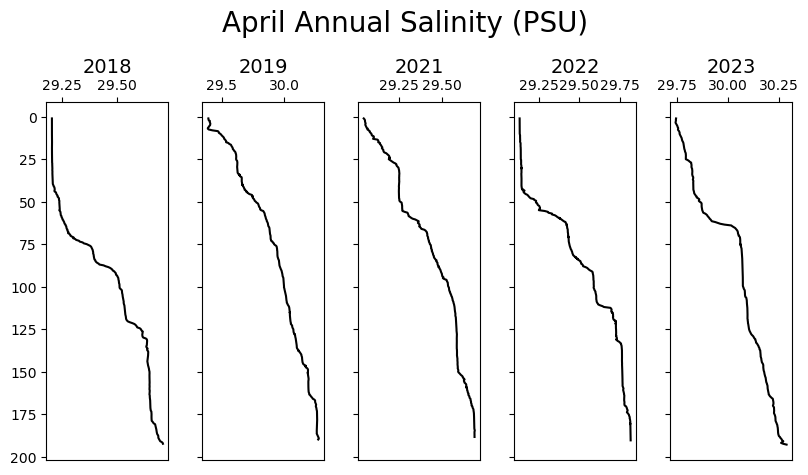

In [10]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5,sharey=True)
fig.set_figwidth(8.2)

# Salinity
ax1.plot(up18['Salinity_field'],up18['Sample_Depth'], color = 'k')
ax1.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax1.set_xlabel('2018', fontsize = '14')
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top


# Salinity
ax2.plot(up19['Salinity_field'],up19['Sample_Depth'], color = 'k')
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('2019', fontsize = '14')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top

# Salinity
ax3.plot(up21['Salinity_field'],up21['Sample_Depth'], color = 'k')
ax3.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax3.set_xlabel('2021', fontsize = '14')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top


# Salinity
ax4.plot(up22['Salinity_field'],up22['Sample_Depth'], color = 'k')
ax4.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax4.set_xlabel('2022', fontsize = '14')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top


# Salinity
ax5.plot(up23['Salinity_field'],up23['Sample_Depth'], color = 'k')
ax5.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax5.set_xlabel('2023', fontsize = '14')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top

fig.suptitle('April Annual Salinity (PSU)', fontsize = '20')
plt.tight_layout(rect=[0, 0, 1, 1])

## Fluorescence for all years

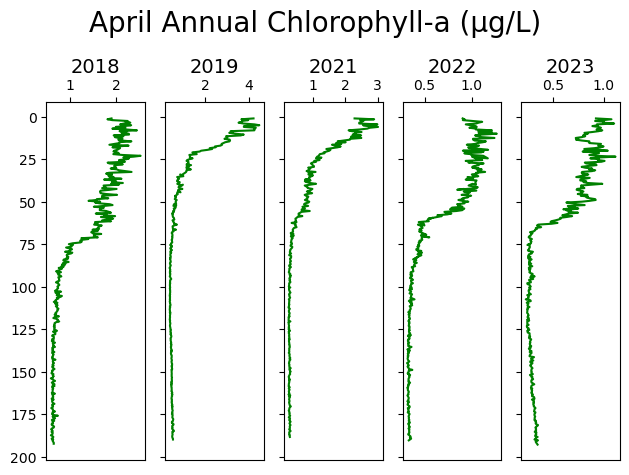

In [12]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5,sharey=True)

# Fluorescence
ax1.plot(up18['Chla_field'],up18['Sample_Depth'], color = 'green')
ax1.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax1.set_xlabel('2018', fontsize = '14')
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top

# Fluorescence
ax2.plot(up19['Chla_field'],up19['Sample_Depth'], color = 'green')
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('2019', fontsize = '14')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top

# Fluorescence
ax3.plot(up21['Chla_field'],up21['Sample_Depth'], color = 'green')
ax3.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax3.set_xlabel('2021', fontsize = '14')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top

# Fluorescence
ax4.plot(up22['Chla_field'],up22['Sample_Depth'], color = 'green')
ax4.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax4.set_xlabel('2022', fontsize = '14')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top

# Fluorescence
ax5.plot(up23['Chla_field'],up23['Sample_Depth'], color = 'green')
ax5.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax5.set_xlabel('2023', fontsize = '14')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top

fig.suptitle('April Annual Chlorophyll-a (µg/L)', fontsize = '20')
plt.tight_layout(rect=[0, 0, 1, 1])

In [11]:
up18


,Locator,Sample_Date,Sample_Depth,UpDown,Sample_Temperature_field,Chla_field,Salinity_field
385,LSEP01,4/3/2018 7:53,192.5,Up,8.2628,0.6500,29.7122
386,LSEP01,4/3/2018 7:54,192.0,Up,8.2636,0.6531,29.7110
387,LSEP01,4/3/2018 7:54,191.5,Up,8.2660,0.6404,29.7067
388,LSEP01,4/3/2018 7:54,191.0,Up,8.2702,0.6306,29.6996
389,LSEP01,4/3/2018 7:54,190.5,Up,8.2714,0.6219,29.6973
...,...,...,...,...,...,...,...
764,LSEP01,4/3/2018 8:05,3.0,Up,8.3969,2.1965,29.2022
765,LSEP01,4/3/2018 8:05,2.5,Up,8.3965,2.2435,29.2022
766,LSEP01,4/3/2018 8:05,2.0,Up,8.3964,1.9090,29.2022
767,LSEP01,4/3/2018 8:06,1.5,Up,8.3957,1.8055,29.2022
